In [ ]:
#TODO Jupyter widget for plot (sliding bar, etc.)

In [7]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import dateutil.parser as dp
import re
import warnings
%matplotlib inline 

STATION_GROUP = ['STATION'] #['C/A', 'UNIT', 'STATION']
TURN_GROUP = STATION_GROUP + ['SCP']

In [8]:
def ChooseTurnstile(station):
    a = turn.loc[turn["STATION"] == station]
    return a

In [33]:
def plotStations(summer, fall, station, yaxisV = 55000):
    #This is the code for plotting
    plt.scatter(summer['day'], summer['summer exits'])
    plt.scatter(fall['day'], fall['fall exits'])
    plt.ylim(0, yaxisV)
    plt.xlabel('Day (Count Starting from 1st Monday of the Month)')
    plt.ylabel('Number of People Exiting') #, fontsize=40)
    plt.title('Passenger Traffic At "{0:s}" Station in Summer and Fall'.format(station))
    plt.legend(('July 2016', 'October 2016'), loc = 'lower right')
    return plt.show()

In [10]:
def ExitStation(new_dogDay):
    #This creates dataframe but does not plot
    newNames = ['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time', 'desc', 'entries', 'exits']
    new_dogDay.columns = newNames
    new_dogDay['corrected'] = new_dogDay.groupby(['c/a','unit', 'scp', 'date'])['exits'].transform(pd.Series.diff)
    new_dogDay_exits = new_dogDay[['c/a', 'unit', 'scp', 'date', 'exits']]
    new_dogDay_exits['corrected'] = new_dogDay_exits.groupby(['c/a','unit', 'scp', 'date'])['exits'].transform(pd.Series.diff)
    ndD = new_dogDay_exits[['date', 'corrected']]
    ndD_combined = ndD.groupby('date').sum()
    ndD = ndD_combined['corrected']
    ndD = ndD.reset_index()
    ndD['date'] = pd.to_datetime(ndD['date'])
    ndD.rename(columns = {'corrected' : 'exits'}, inplace = True)
    summer = (ndD['date'] > dp.parse('2016-07-03')) & (ndD['date'] <= dp.parse('2016-08-30'))
    fall = (ndD['date'] > dp.parse('2016-10-02')) & (ndD['date'] <= dp.parse('2016-12-30'))
    ndDj = ndD[summer]
    ndDo = ndD[fall]
    ndDj.rename(columns = {'exits' : 'summer exits'}, inplace = True)
    ndDo.rename(columns = {'exits' : 'fall exits'}, inplace = True)
    day = list(range(1, 27))
    ndDj['day'] = day
    ndDo['day'] = day
    return ndDj, ndDo

In [11]:
def ExitStationP(dogDay, V):
    #This creates the dataframe and plots
    new_dogDay = ChooseTurnstile(dogDay)
    
    newNames = ['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time', 'desc', 'entries',
                'exits']
    new_dogDay.columns = newNames
    
    new_dogDay['corrected'] = new_dogDay.groupby(['c/a','unit', 'scp', 'date'])['exits'].transform(pd.Series.diff)
    
    new_dogDay_exits = new_dogDay[['c/a', 'unit', 'scp', 'date', 'exits']]
    
    new_dogDay_exits['corrected'] = new_dogDay_exits.groupby(['c/a','unit', 'scp', 'date'])['exits'].transform(pd.Series.diff)
    
    ndD = new_dogDay_exits[['date', 'corrected']]
    
    ndD_combined = ndD.groupby('date').sum()
    
    ndD = ndD_combined['corrected']
    ndD = ndD.reset_index()
    
    ndD['date'] = pd.to_datetime(ndD['date'])
    ndD.rename(columns = {'corrected' : 'exits'}, inplace = True)
    
    summer = (ndD['date'] > dp.parse('2016-07-03')) & (ndD['date'] <= dp.parse('2016-08-30'))
    fall = (ndD['date'] > dp.parse('2016-10-02')) & (ndD['date'] <= dp.parse('2016-12-30'))
    ndDj = ndD[summer]
    ndDo = ndD[fall]
    
    ndDj.rename(columns = {'exits' : 'summer exits'}, inplace = True)
    ndDo.rename(columns = {'exits' : 'fall exits'}, inplace = True)
    
    day = list(range(1, 27))
    ndDj['day'] = day
    ndDo['day'] = day
    
    return plotStations(ndDj, ndDo, dogDay, V)

In [16]:
warnings.filterwarnings('ignore')

In [12]:
#import os
#dir1 = r'/Users/walterkerr/metis/sf17_ds6/week1/Benson_Presentation/Benson_Challenges'
#for files in os.walk(dir1):
#    for file in files:
#        print(file)
#        #filenames += [file]

try:
    del turn
except:
    pass

filenames = ['turnstile_150704.txt', 'turnstile_150711.txt', 'turnstile_150718.txt', 'turnstile_150725.txt', 'turnstile_151003.txt', 'turnstile_151010.txt', 'turnstile_151017.txt', 'turnstile_151024.txt', 'turnstile_151031.txt', 'turnstile_160702.txt', 'turnstile_160709.txt', 'turnstile_160716.txt', 'turnstile_160723.txt', 'turnstile_160730.txt', 'turnstile_161001.txt', 'turnstile_161008.txt', 'turnstile_161015.txt', 'turnstile_161022.txt', 'turnstile_161029.txt']
for fn in filenames:
    temp = pd.read_csv(fn)
    try:
        turn = turn.append(temp)
    except:
        turn = temp.copy()
turn = turn.reset_index()

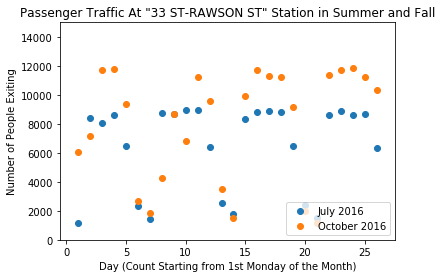

In [17]:
ExitStationP('33 ST-RAWSON ST', 15000)

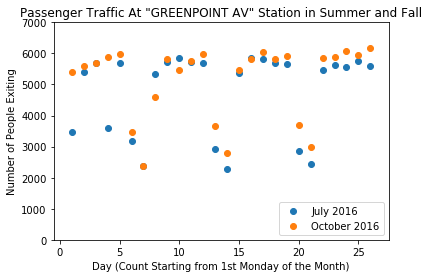

In [18]:
ExitStationP('GREENPOINT AV', 7000)

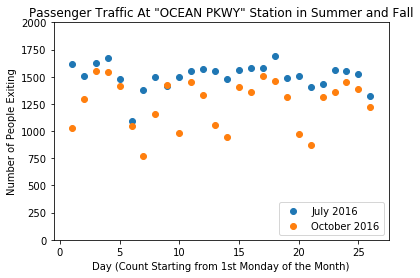

In [39]:
#plt.figure(figsize = (20, 6))
ExitStationP('OCEAN PKWY', 2000)

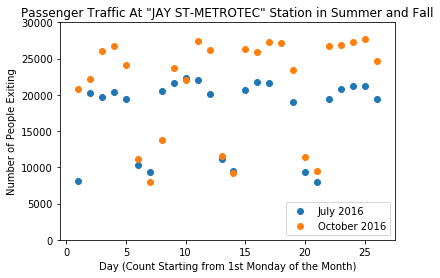

In [27]:
ExitStationP('JAY ST-METROTEC', 30000) #NYC College of Technology

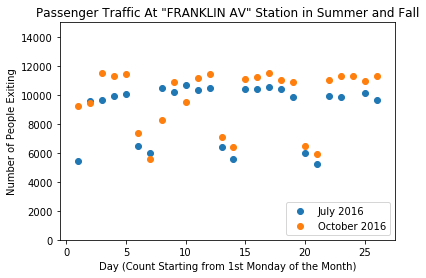

In [38]:
ExitStationP('FRANKLIN AV', 15000)

# Final plots for presentation

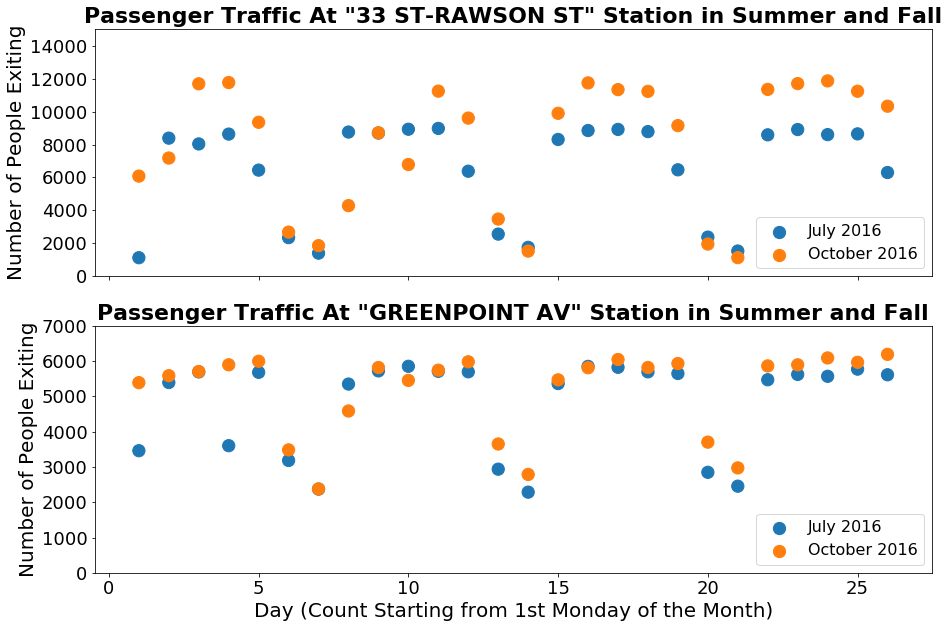

In [72]:
def plotStations(summer, fall, station, yaxisV = 55000):
    #This is the code for plotting
    s = [150*1 for n in range(len(list(summer['day'])))]
    plt.scatter(summer['day'], summer['summer exits'], s = s)
    plt.scatter(fall['day'], fall['fall exits'], s = s)
    plt.ylim(0, yaxisV)
    plt.ylabel('Number of People Exiting', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title('Passenger Traffic At "{0:s}" Station in Summer and Fall'.format(station), fontsize=22, fontweight = "bold")
    plt.legend(('July 2016', 'October 2016'), loc = 'lower right', fontsize=16)
    return None #plt.show()
plt.figure(figsize = (15, 10))
ax1 = plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1)
ExitStationP('33 ST-RAWSON ST', 15000)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplot(2, 1, 2, sharex=ax1) #, sharey=ax1)
plt.xlabel('Day (Count Starting from 1st Monday of the Month)', fontsize=20)
ExitStationP('GREENPOINT AV', 7000)
plt.show()

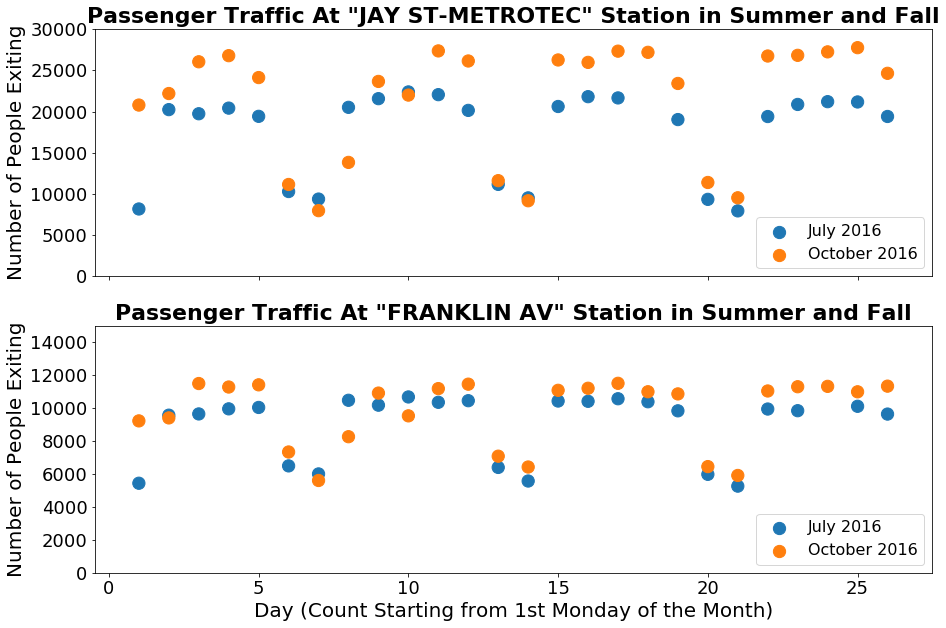

In [73]:
def plotStations(summer, fall, station, yaxisV = 55000):
    #This is the code for plotting
    s = [150*1 for n in range(len(list(summer['day'])))]
    plt.scatter(summer['day'], summer['summer exits'], s = s)
    plt.scatter(fall['day'], fall['fall exits'], s = s)
    plt.ylim(0, yaxisV)
    plt.ylabel('Number of People Exiting', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title('Passenger Traffic At "{0:s}" Station in Summer and Fall'.format(station), fontsize=22, fontweight = "bold")
    plt.legend(('July 2016', 'October 2016'), loc = 'lower right', fontsize=16)
    return None #plt.show()
plt.figure(figsize = (15, 10))
ax1 = plt.subplot(2, 1, 1)
plt.subplot(2, 1, 1)
ExitStationP('JAY ST-METROTEC', 30000)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplot(2, 1, 2, sharex=ax1) #, sharey=ax1)
plt.xlabel('Day (Count Starting from 1st Monday of the Month)', fontsize=20)
ExitStationP('FRANKLIN AV', 15000)
plt.show()

# My old code w/o Thaddeus's functions

In [ ]:
turn.shape

In [ ]:
Laguardia16 = ChooseTurnstile('33 ST-RAWSON ST')
Laguardia15 = ChooseTurnstile('33 ST/RAWSON ST')
Greenpoint16 = ChooseTurnstile('GREENPOINT AV')
Greenpoint15 = ChooseTurnstile('GREENPOINT AVE')
del turn

In [ ]:
print(Laguardia16.shape)
print(Greenpoint16.shape)
print(Laguardia15.shape)
print(Greenpoint15.shape)

In [ ]:
turn = Laguardia16.append(Laguardia15)
turn = turn.append(Greenpoint16)
turn = turn.append(Greenpoint15)
turn = turn.reset_index()

In [ ]:
turn.shape

In [ ]:
shape = turn.shape
turn.columns = turn.columns.str.strip()
turn.loc[:, 'd'] = turn['DATE'].map(lambda x: pd.to_datetime(x))
turn.loc[:, 'ts'] = turn['DATE'].str.cat(turn['TIME'], sep = " ").map(lambda x: pd.to_datetime(x))
turn.loc[:, 'hr'] = turn['ts'].dt.hour
turn.loc[:, 'wday_ch'] = turn.loc[:, 'd'].map(lambda x: x.strftime("%A"))
turn.loc[:, 'wday_num'] = turn.loc[:, 'd'].map(lambda x: x.isoweekday())
turn.loc[:, 'wk'] = turn.loc[:, 'd'].map(lambda x: x.isocalendar()[1])
#turn['d'].value_counts()
turn.loc[turn['d'].isin(pd.date_range(dt.datetime(2015, 6, 1), dt.datetime(2015, 8, 1))), 'timeslot'] = "Summer2015"
turn.loc[turn['d'].isin(pd.date_range(dt.datetime(2015, 9, 1), dt.datetime(2015, 11, 1))), 'timeslot'] = "Fall2015"
turn.loc[turn['d'].isin(pd.date_range(dt.datetime(2016, 6, 1), dt.datetime(2016, 8, 1))), 'timeslot'] = "Summer2016"
turn.loc[turn['d'].isin(pd.date_range(dt.datetime(2016, 9, 1), dt.datetime(2016, 11, 1))), 'timeslot'] = "Fall2016"
turn.sort_values(TURN_GROUP + ['ts'], inplace = True)
turn.loc[:, 'net_enter'] = turn['ENTRIES'] - turn.groupby(TURN_GROUP)['ENTRIES'].shift(1)
turn.loc[:, 'net_exits'] = turn['EXITS'] - turn.groupby(TURN_GROUP)['EXITS'].shift(1)
turn.loc[:, 'tot_traffic'] = turn['net_enter'] + turn['net_exits']
#turn.loc[:, 'net_traffic'] = turn['net_enter'] - turn['net_exits']
turn = turn[turn['DESC'] == 'REGULAR']
turn.loc[turn['net_enter'] < 0, 'net_enter'] = np.nan
turn.loc[turn['net_exits'] < 0, 'net_exits'] = np.nan
#turn['net_exits'].hist(); turn.loc[turn['net_exits'] > 20000, 'd'].value_counts()
turn.loc[turn['net_exits'] > 20000, 'net_exits'] = np.nan

In [ ]:
turn['timeslot'].value_counts()

In [ ]:
print(turn.columns)

In [ ]:
turn.shape

In [ ]:
turn.head(1)

In [ ]:
turn.tail(1)

In [ ]:
turn_byDay = pd.DataFrame(turn.groupby(STATION_GROUP + ['d', 'wday_ch', 'wday_num', 'wk', 'timeslot'])['net_exits'].sum())
turn_byDay.reset_index(inplace = True)
turn_byDay.head()

In [ ]:
turn_byDOW = pd.DataFrame(turn.groupby(STATION_GROUP + ['wday_ch', 'wday_num', 'timeslot'])['net_exits'].sum())
turn_byDOW.reset_index(inplace = True)
turn_byDOW.head()

In [ ]:
station_str = turn_byDOW['STATION'] == '33 ST-RAWSON ST'
time_str = turn_byDOW['timeslot'].map(lambda x: re.match('.*2016', x) != None)
Laguardia16_byDOW = turn_byDOW[(station_str) & (time_str)]
print(Laguardia16_byDOW.shape, Laguardia16_byDOW.columns)

In [ ]:
Laguardia16_byDOW_sum = Laguardia16_byDOW.copy().loc[Laguardia16_byDOW['timeslot'] == 'Summer2016']
Laguardia16_byDOW_sum.sort_values(['wday_num'], inplace = True)
Laguardia16_byDOW_fal = Laguardia16_byDOW.copy().loc[Laguardia16_byDOW['timeslot'] == 'Fall2016']
Laguardia16_byDOW_fal.sort_values(['wday_num'], inplace = True)

plt.figure(figsize = (15, 6))
plt.plot(Laguardia16_byDOW_sum['wday_num'], Laguardia16_byDOW_sum['net_exits'], 'b', label = "Jul 2016")
plt.plot(Laguardia16_byDOW_fal['wday_num'], Laguardia16_byDOW_fal['net_exits'], 'y', label = "Oct 2016")
plt.legend(fontsize = 14)
plt.plot(Laguardia16_byDOW_sum['wday_num'], Laguardia16_byDOW_sum['net_exits'], 'bo')
plt.plot(Laguardia16_byDOW_fal['wday_num'], Laguardia16_byDOW_fal['net_exits'], 'yo')
plt.ylim(0, 60000)
plt.ylabel(r"N of total exits from one station in a month", fontsize = 14)
plt.xlabel(r"Day of Week (1=Mon)", fontsize = 14)
plt.title("CUNY LaGuardia Turnstile Traffic by Season (Station 33 St-Rawson St)\n", fontsize = 16, fontweight="bold")
plt.show()

# Moving on to the control station..

In [ ]:
del Laguardia16_byDOW_sum, Laguardia16_byDOW_fal

station_str = turn_byDOW['STATION'] == 'GREENPOINT AV'
time_str = turn_byDOW['timeslot'].map(lambda x: re.match('.*2016', x) != None)
Greenpoint16_byDOW = turn_byDOW[(station_str) & (time_str)]
print(Greenpoint16_byDOW.shape, Greenpoint16_byDOW.columns)

In [ ]:
Greenpoint16_byDOW_sum = Greenpoint16_byDOW.copy().loc[Greenpoint16_byDOW['timeslot'] == 'Summer2016']
Greenpoint16_byDOW_sum.sort_values(['wday_num'], inplace = True)
Greenpoint16_byDOW_fal = Greenpoint16_byDOW.copy().loc[Greenpoint16_byDOW['timeslot'] == 'Fall2016']
Greenpoint16_byDOW_fal.sort_values(['wday_num'], inplace = True)

In [ ]:
plt.figure(figsize = (15, 6))
plt.plot(Greenpoint16_byDOW_sum['wday_num'], Greenpoint16_byDOW_sum['net_exits'], 'b', label = "Jul 2016")
plt.plot(Greenpoint16_byDOW_fal['wday_num'], Greenpoint16_byDOW_fal['net_exits'], 'y', label = "Oct 2016")
plt.legend(fontsize = 14)
plt.plot(Greenpoint16_byDOW_sum['wday_num'], Greenpoint16_byDOW_sum['net_exits'], 'bo')
plt.plot(Greenpoint16_byDOW_fal['wday_num'], Greenpoint16_byDOW_fal['net_exits'], 'yo')
plt.ylim(0, 60000)
plt.ylabel(r"N of total exits from one station in a month", fontsize = 14)
plt.xlabel(r"Day of Week (1=Mon)", fontsize = 14)
plt.title("Non-School-Adjacent Traffic by Season (Station Greenpoint Ave)\n", fontsize = 16, fontweight="bold")
plt.show()